In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-data-for-marketing-analysis/customer_segmentation_data.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
datos = pd.read_csv('/kaggle/input/customer-segmentation-data-for-marketing-analysis/customer_segmentation_data.csv', index_col=0)

In [5]:
datos.head()

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,38,Female,99342,90,3,24,Groceries,113.53
2,21,Female,78852,60,2,42,Sports,41.93
3,60,Female,126573,30,2,28,Clothing,424.36
4,40,Other,47099,74,9,5,Home & Garden,991.93
5,65,Female,140621,21,3,25,Electronics,347.08


In [6]:
print(' la cantidad de valores únicos son ' + str(len(datos.index.unique())))

 la cantidad de valores únicos son 1000


In [7]:
print('el tamaño del data set es de ' + str(datos.shape[0]) + ' filas y '+ str(datos.shape[1]) + ' columnas.')

el tamaño del data set es de 1000 filas y 8 columnas.


In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1000 non-null   int64  
 1   gender                1000 non-null   object 
 2   income                1000 non-null   int64  
 3   spending_score        1000 non-null   int64  
 4   membership_years      1000 non-null   int64  
 5   purchase_frequency    1000 non-null   int64  
 6   preferred_category    1000 non-null   object 
 7   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(5), object(2)
memory usage: 102.6+ KB


In [9]:
datos.nunique()

age                      52
gender                    3
income                  996
spending_score          100
membership_years         10
purchase_frequency       50
preferred_category        5
last_purchase_amount    994
dtype: int64

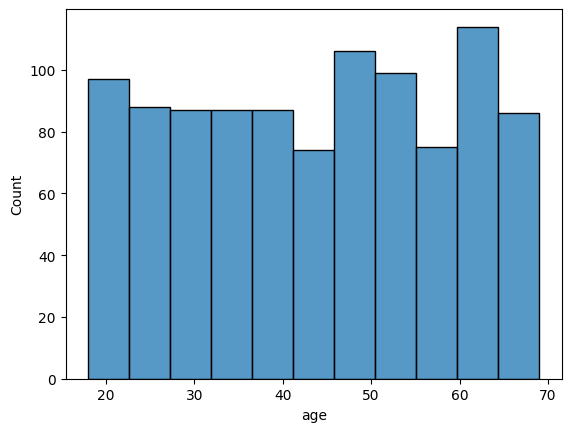

In [10]:
sns.histplot(datos.age)
plt.show()

In [11]:
def categoricas(x):
    salida =[]
    for i in x.columns:
        if x[i].dtypes == 'object':
            salida.append(i)
        else:
            None
    return salida

In [12]:
lista_categoricas = categoricas(datos)
print(lista_categoricas)

['gender', 'preferred_category']


In [13]:
def numericias(x):
    salida = []
    for i in datos.columns:
        if datos[i].dtypes=='int64':
            salida.append(i)
        elif datos[i].dtypes=='float64':
            salida.append(i)
        else:
            None
    return salida
        

datos.drop(['id'], axis=1, inplace=True)

In [14]:
lista_numericas = numericias(datos)
print(lista_numericas)

['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']


In [15]:
datos.gender.value_counts().reset_index()['count']

0    357
1    327
2    316
Name: count, dtype: int64

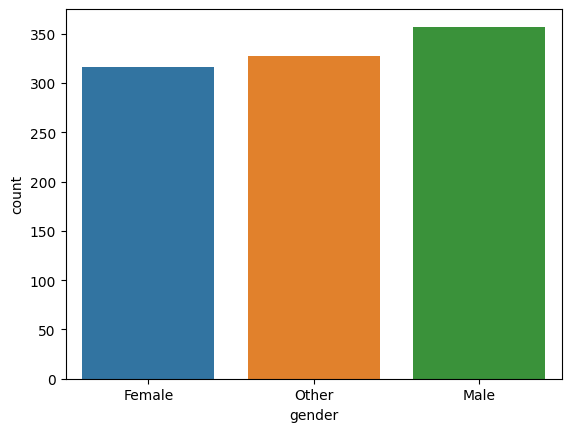

In [16]:
sns.countplot(datos, x="gender")
plt.show()

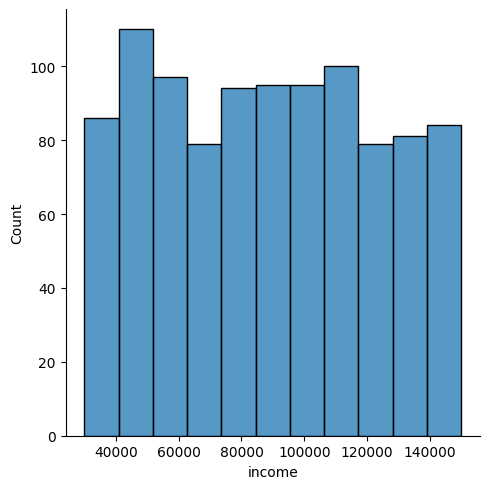

In [17]:
sns.displot(datos.income)
plt.show()

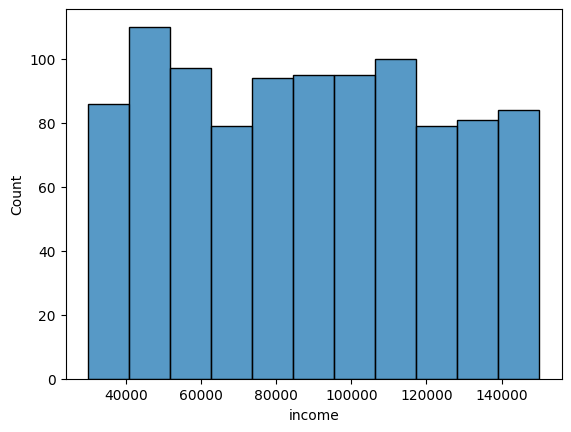

In [18]:
sns.histplot(datos.income)
plt.show()

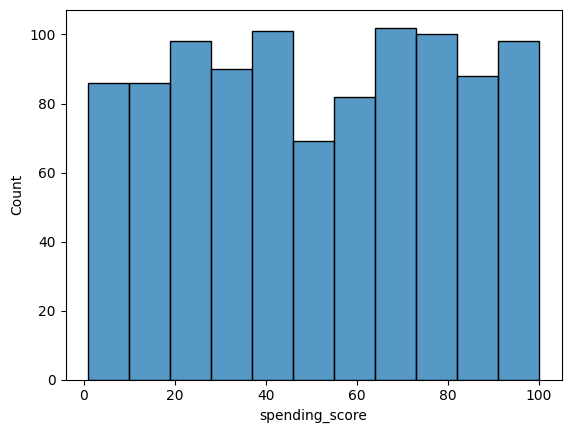

In [19]:
sns.histplot(datos.spending_score)
plt.show()

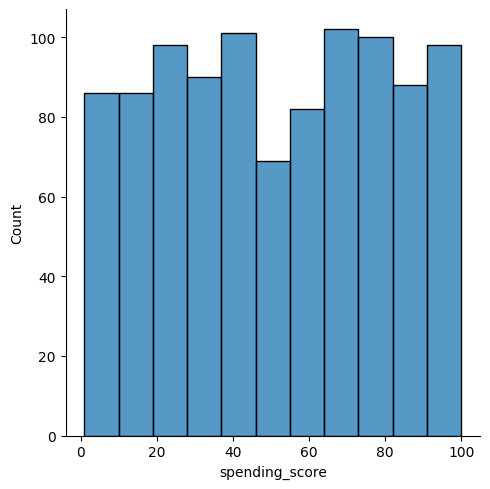

In [20]:
sns.displot(datos.spending_score)
plt.show()

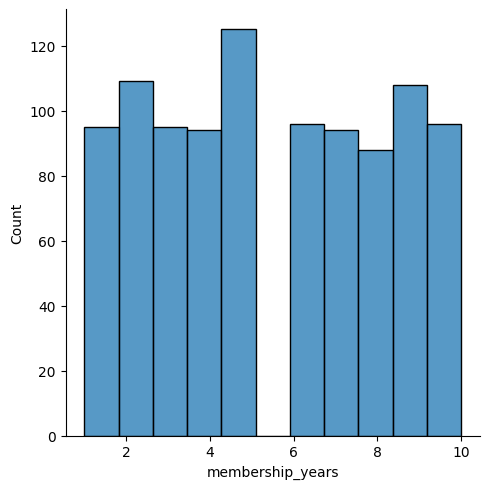

In [21]:
sns.displot(datos.membership_years)
plt.show()

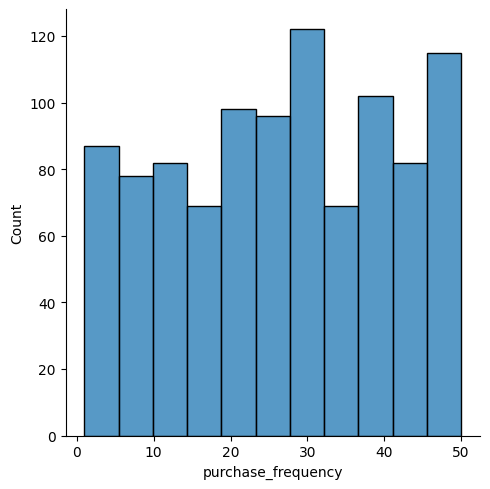

In [22]:
sns.displot(datos.purchase_frequency)
plt.show()

In [23]:
for i in range(0,6):
    print(i//2, i %2)

0 0
0 1
1 0
1 1
2 0
2 1


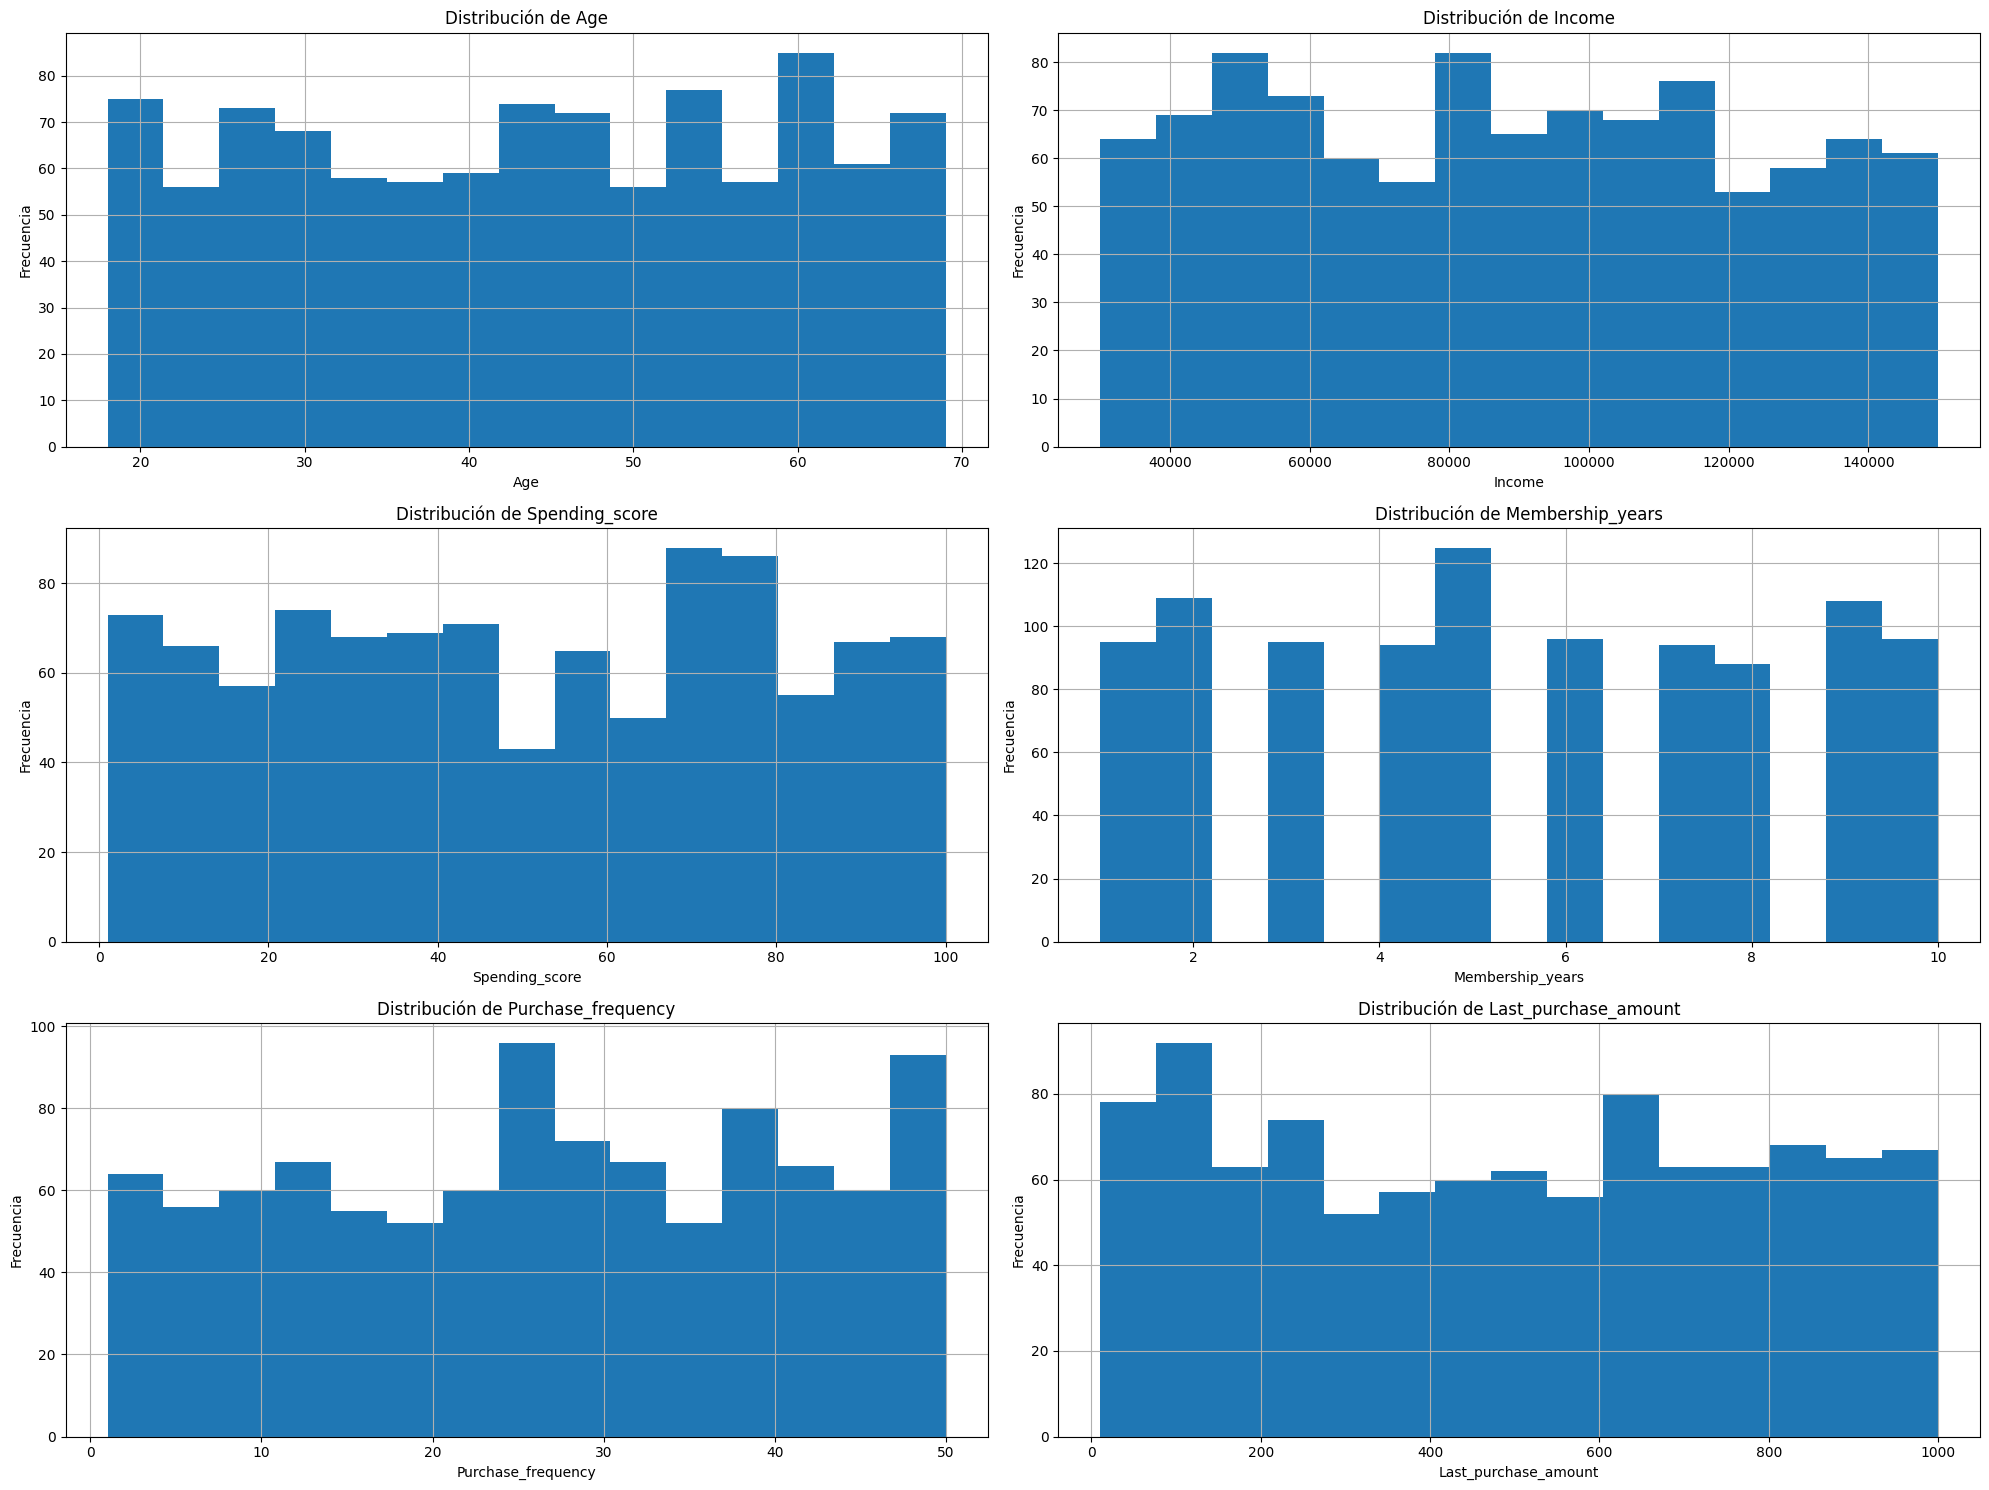

In [24]:
fig, axes = plt.subplots(3,2, figsize=(20,15))
for i, feature in enumerate(lista_numericas):
    ax = axes[i //2, i %2]
    datos[feature].hist(bins=15, ax=ax, grid=True)
    ax.set_title(f'Distribución de {feature.capitalize()}')
    ax.set_xlabel(feature.capitalize())
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

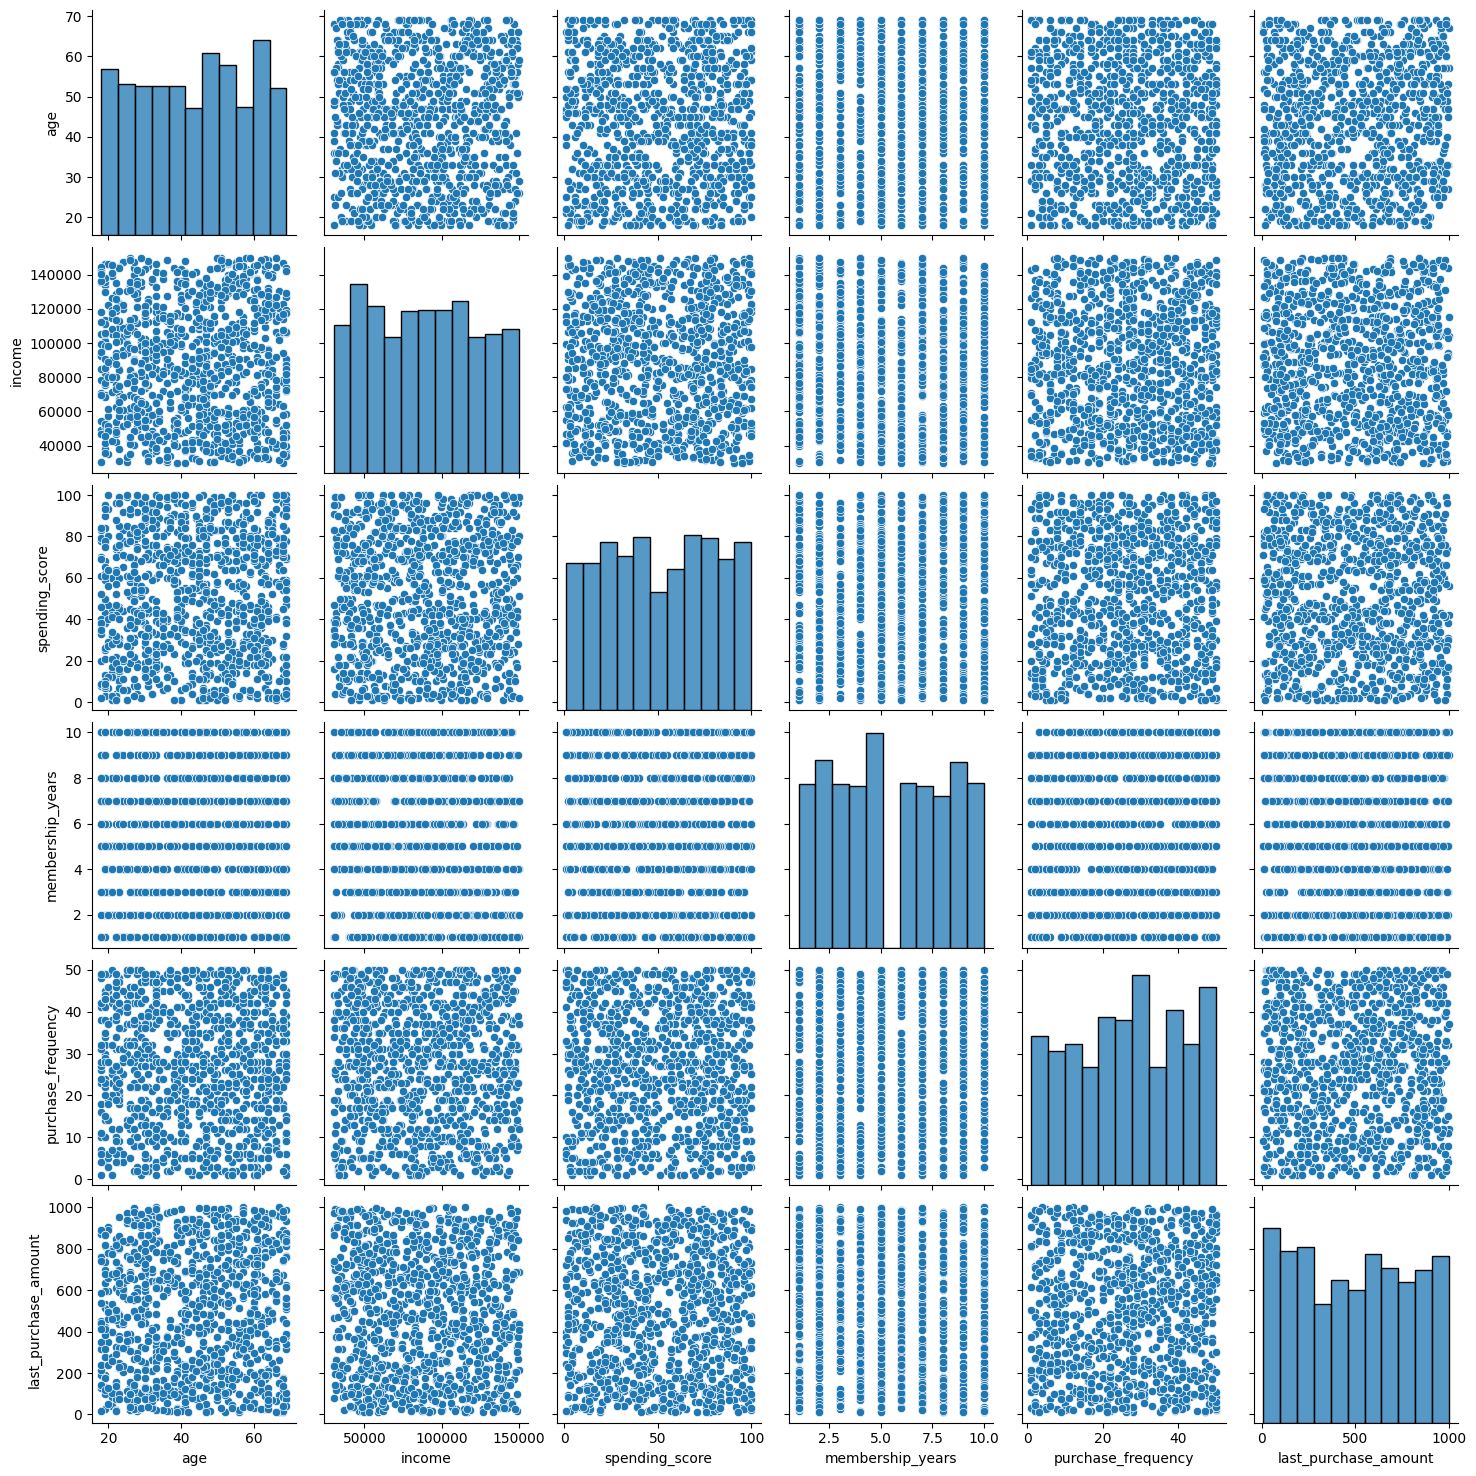

In [25]:
sns.pairplot(datos)
plt.show()

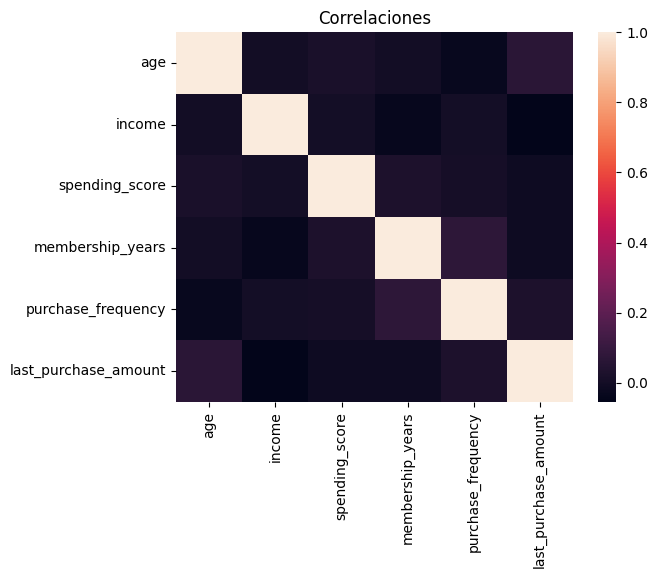

In [26]:
corr = datos.select_dtypes("number").corr()
sns.heatmap(corr)
plt.title("Correlaciones")
plt.show()

In [27]:
datos.drop_duplicates(inplace=True)

### ClAUSTERING

In [28]:
lista_numericas
valores_escalado = datos[lista_numericas]


## Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos_escalados = scaler.fit_transform(valores_escalado)
escalados_df = pd.DataFrame(datos_escalados, columns=lista_numericas)

escalados_df.index = datos.index
datos[lista_numericas] = escalados_df

display(datos.head(10))

,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
id,,,,,,,,
1,-0.384644,Female,0.316868,1.358468,-0.865010,-0.182348,Groceries,-1.281540
2,-1.515362,Female,-0.282016,0.321865,-1.215358,1.082005,Sports,-1.523763
3,1.078639,Female,1.112778,-0.714738,-1.215358,0.098620,Clothing,-0.230005
4,-0.251618,Other,-1.210096,0.805613,1.237080,-1.516943,Home & Garden,1.690080
5,1.411203,Female,1.523374,-1.025718,-0.865010,-0.112106,Electronics,-0.491443
6,-0.850234,Other,-0.911794,-0.922058,-0.865010,0.239103,Home & Garden,-1.371799
7,-1.648388,Other,-0.999069,0.598292,-0.164313,1.152247,Clothing,-1.017024
8,-0.052080,Male,0.573286,1.496681,1.237080,0.028378,Groceries,0.819399
9,0.613049,Male,-1.580562,-0.749291,0.186035,-1.376459,Sports,1.554016


In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

def df_numericas(x):
    salida = pd.DataFrame()
    for i in x.columns:
        salida[std(i)+'_scaled'] = ss.fit_transform(x[i])
    return salida

In [30]:
datos_numericas = pd.DataFrame(ss.fit_transform(datos.loc[:, lista_numericas]), columns=lista_numericas)

In [31]:
datos_numericas

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443
...,...,...,...,...,...,...
995,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570
996,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247
997,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583
998,-1.448849,0.736379,0.425525,0.536383,1.222489,0.043341


In [32]:
datos_categoricas = pd.get_dummies(datos.loc[:,lista_categoricas], dtype=int).reset_index(drop=True)

In [33]:
input = pd.concat([datos_numericas, datos_categoricas], axis=1)

In [34]:
input[input.age.isna()]

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports


In [35]:
input.isna().sum()

age                                 0
income                              0
spending_score                      0
membership_years                    0
purchase_frequency                  0
last_purchase_amount                0
gender_Female                       0
gender_Male                         0
gender_Other                        0
preferred_category_Clothing         0
preferred_category_Electronics      0
preferred_category_Groceries        0
preferred_category_Home & Garden    0
preferred_category_Sports           0
dtype: int64

In [36]:
num_clusters = 10
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=num_clusters, n_init=100) # set upa the algorithm

In [37]:
# Launch the k-means algorithm
kmeans.fit(input) # train/fit the algorithm to the data

KMeans(n_clusters=10, n_init=100)

In [38]:
# See the 10 centroids for each cluster
kmeans.cluster_centers_

array([[-1.07507601,  0.07582798, -1.01031951, -0.50323735, -0.76489695,
         0.51312162,  0.30434783,  0.41304348,  0.2826087 ,  0.14130435,
         0.29347826,  0.19565217,  0.16304348,  0.20652174],
       [ 0.90183249, -0.65288885, -0.04291404, -0.46587907, -0.82252657,
         1.14216804,  0.29113924,  0.26582278,  0.44303797,  0.20253165,
         0.17721519,  0.13924051,  0.25316456,  0.2278481 ],
       [-0.18965313, -0.24730284,  0.95150524, -0.32900706, -0.86075186,
        -0.91429992,  0.47008547,  0.2991453 ,  0.23076923,  0.13675214,
         0.17948718,  0.24786325,  0.22222222,  0.21367521],
       [-0.29418631, -0.6745933 ,  1.02329958,  0.92877353,  0.71674769,
         0.23570261,  0.28      ,  0.4       ,  0.32      ,  0.15      ,
         0.19      ,  0.21      ,  0.19      ,  0.26      ],
       [-0.48585897,  0.7051563 ,  0.86720825, -0.8954752 ,  0.01005374,
         0.66106095,  0.31521739,  0.32608696,  0.35869565,  0.2173913 ,
         0.20652174,  0.19

In [39]:
kmeans.labels_[:50]

array([2, 9, 5, 1, 5, 9, 9, 7, 1, 1, 9, 6, 2, 8, 0, 5, 5, 0, 2, 2, 0, 3,
       4, 2, 6, 9, 8, 9, 2, 0, 0, 2, 9, 2, 3, 0, 5, 3, 9, 9, 6, 5, 9, 3,
       6, 9, 5, 2, 2, 4], dtype=int32)

In [40]:
input

,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount,gender_Female,gender_Male,gender_Other,preferred_category_Clothing,preferred_category_Electronics,preferred_category_Groceries,preferred_category_Home & Garden,preferred_category_Sports
0,-0.384644,0.316868,1.358468,-0.865010,-0.182348,-1.281540,1,0,0,0,0,1,0,0
1,-1.515362,-0.282016,0.321865,-1.215358,1.082005,-1.523763,1,0,0,0,0,0,0,1
2,1.078639,1.112778,-0.714738,-1.215358,0.098620,-0.230005,1,0,0,1,0,0,0,0
3,-0.251618,-1.210096,0.805613,1.237080,-1.516943,1.690080,0,0,1,0,0,0,1,0
4,1.411203,1.523374,-1.025718,-0.865010,-0.112106,-0.491443,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.879100,0.691806,0.218205,0.186035,-1.797910,-0.604570,0,1,0,1,0,0,0,0
996,-1.382336,-0.677034,0.874720,1.587428,-0.252590,0.475247,0,0,1,0,0,1,0,0
997,-1.382336,0.718900,-0.369203,-0.164313,1.082005,-1.411583,0,1,0,0,0,0,0,1
998,-1.448849,0.736379,0.425525,0.536383,1.222489,0.043341,1,0,0,0,1,0,0,0


In [41]:
input.drop('gender_Other', axis=1, inplace=True)

In [42]:
input.gender_Female.value_counts()

gender_Female
0    684
1    316
Name: count, dtype: int64

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(input, kmeans.labels_)
print("For n_clusters =", num_clusters,
          ", the average silhouette_score is :", silhouette_avg)

For n_clusters = 10 , the average silhouette_score is : 0.10494801145640135


Text(0.5, 1.0, 'Selecting number of clusters k')

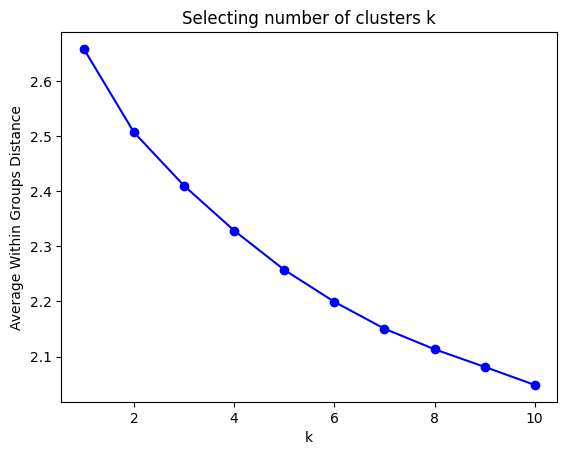

In [44]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
clusters=range(1,11)

meanDistortions = []
scoreSilhouette = []

for k in clusters:
    model = KMeans(n_clusters=k, n_init=25)
    model.fit(input)
    prediction = model.predict(input)
    distance2center = np.min(cdist(input,
                                   model.cluster_centers_,
                                   'euclidean'), axis=1)
    meanDistortions.append(np.mean(distance2center)) # WITHIN GROUPS DISTANCE
    if k>1:
        scoreSilhouette.append(silhouette_score(input, model.labels_)) # SHILOUTTE SCORE
    
    

plt.cla()
plt.plot(clusters, meanDistortions, 'bo-')
plt.xlabel('k')
plt.ylabel('Average Within Groups Distance')
plt.title('Selecting number of clusters k')

Text(0.5, 1.0, 'Selecting number of clusters k')

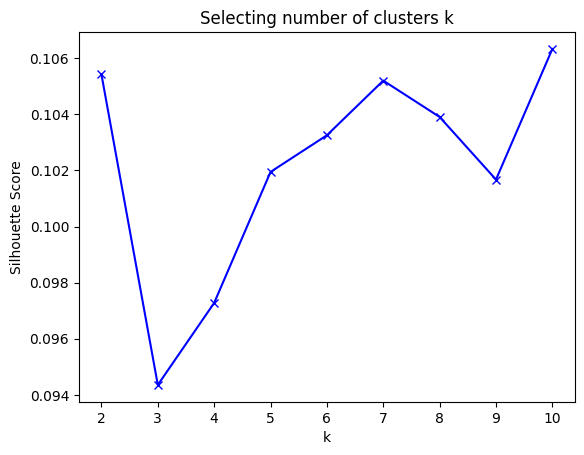

In [45]:
plt.cla()
plt.plot(clusters[1:], scoreSilhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Selecting number of clusters k')

In [46]:
model_4=KMeans(n_clusters=3, random_state=123)
model_4.fit(input)


input['cluster'] = model_4.labels_

#### Vamos realizar una reducción de dimensionalidad para poder visualizarlo.

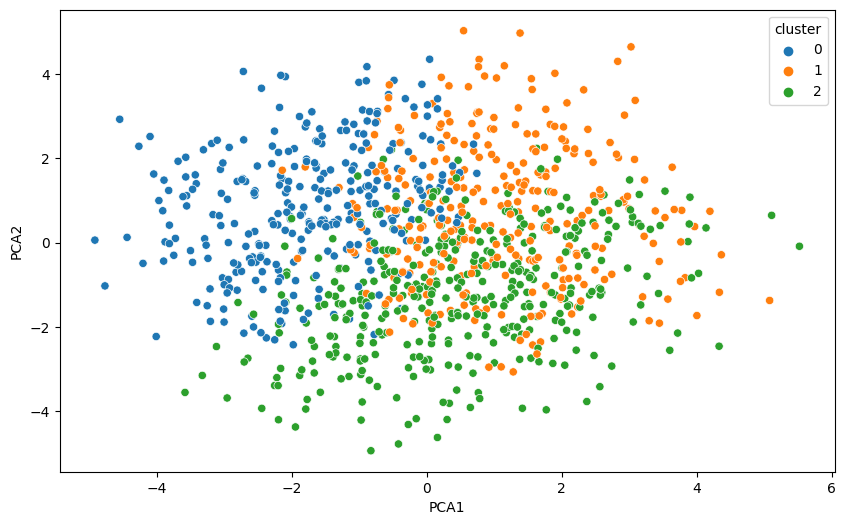

In [54]:
from sklearn.decomposition import PCA
pca = PCA( n_components = 2, random_state=123)
pca_components = pca.fit_transform(input.drop('cluster', axis=1, errors='ignore'))

input['PCA1'] = pca_components[:,0]
input['PCA2'] = pca_components[:,1]

kmeans = KMeans(n_clusters=3, random_state=3)
labels = kmeans.fit_predict(input.drop('cluster', axis=1, errors='ignore'))

plt.figure(figsize=(10,6))
sns.scatterplot(x='PCA1', y= 'PCA2', hue='cluster', data=input, palette='tab10')

plt.show()